In [1]:
import os
import glob
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import ipyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from keras import regularizers

# LOAD

In [2]:
DATASET_FOLDER = 'data'

In [3]:
def load_dataset(dataset):
    data = np.load(f'{DATASET_FOLDER}/{dataset}.npz')
    imgs = data['imgs'].astype(np.float32)/255
    imgs = np.expand_dims(imgs, axis=-1)
    
    df = pd.read_csv(f'{DATASET_FOLDER}/{dataset}.csv')
    names = [name.replace('.png', '') for name in data['names']]
    assert (df.name == names).all()
    if 'label' in df.columns:
        labels = df.label.values
    else:
        labels = None
    
    return imgs, labels, names

In [4]:
train_imgs, train_labels, train_names = load_dataset('train')
test_imgs, test_labels, test_names = load_dataset('test')

In [5]:
# ipyplot.plot_class_tabs(train_imgs[..., 0], train_labels)
# ipyplot.plot_images(test_imgs[..., 0])

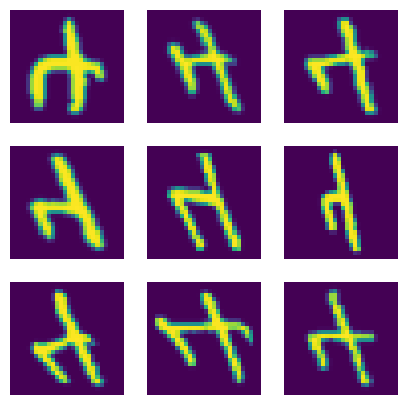

In [6]:
number_to_transform = 4

plt.figure(figsize=(5, 5))
for i in range(9):
    # flip the image vertically
    image = cv2.flip(train_imgs[train_labels == number_to_transform][i], 0)
    cv2.imshow("image", image[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off");
# print(image[0].shape)

In [7]:
numbers_to_flip_vertically = [4,7]
examples_to_use_per_number = 340

number_images_augmented = 0
for i in numbers_to_flip_vertically:
    number_images_augmented += examples_to_use_per_number
train_imgs_augmented = np.empty((number_images_augmented,)+(28,28,1))
train_labels_augmented = np.empty((number_images_augmented,))
train_labels_augmented.fill(10)

In [8]:
print(train_imgs.shape)
print(train_labels.shape)
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)

(60000, 28, 28, 1)
(60000,)
(680, 28, 28, 1)
(680,)


In [9]:
position = 0
for i in numbers_to_flip_vertically:
    for image_to_transform in train_imgs[train_labels == i][:examples_to_use_per_number]:
        train_imgs_augmented[position] = np.expand_dims(cv2.flip(image_to_transform, 0), 2)
        position+=1

In [10]:
train_imgs_augmented = np.vstack((train_imgs,train_imgs_augmented))
train_labels_augmented = np.append(train_labels,train_labels_augmented)

In [11]:
print(train_imgs.shape)
print(train_labels.shape)
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)

(60000, 28, 28, 1)
(60000,)
(60680, 28, 28, 1)
(60680,)


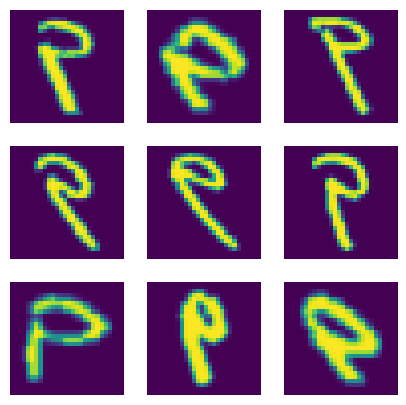

In [12]:
number_to_transform = 9

plt.figure(figsize=(5, 5))
for i in range(9):
    # flip the image horizontally
    image = cv2.flip(train_imgs[train_labels == number_to_transform][i], 1)
    cv2.imshow("image", image[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off");
# print(image[0].shape)

In [13]:
numbers_to_flip_horizontally = [3,4,6,7,9]
examples_to_use_per_number = 340

number_images_augmented = 0
for i in numbers_to_flip_horizontally:
    number_images_augmented += examples_to_use_per_number
train_imgs_horizontally_flipped = np.empty((number_images_augmented,)+(28,28,1))
train_labels_horizontally_flipped = np.empty((number_images_augmented,))
train_labels_horizontally_flipped.fill(10)

In [14]:
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)
print(train_labels_horizontally_flipped.shape)
print(train_labels_horizontally_flipped.shape)

(60680, 28, 28, 1)
(60680,)
(1700,)
(1700,)


In [15]:
position = 0
for i in numbers_to_flip_horizontally:
    for image_to_transform in train_imgs[train_labels == i][:examples_to_use_per_number]:
        train_imgs_horizontally_flipped[position] = np.expand_dims(cv2.flip(image_to_transform, 1), 2)
        position+=1

In [16]:
train_imgs_augmented = np.vstack((train_imgs_augmented,train_imgs_horizontally_flipped))
train_labels_augmented = np.append(train_labels_augmented,train_labels_horizontally_flipped)

In [17]:
np.sum(train_imgs_horizontally_flipped != 0)

433635

In [18]:
print(train_imgs.shape)
print(train_labels.shape)
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)

(60000, 28, 28, 1)
(60000,)
(62380, 28, 28, 1)
(62380,)


In [19]:
import string
caracteresPintables = string.printable
for i in range(10):
    caracteresPintables = caracteresPintables.replace(str(i), '')
# estos se pueden parecer mucho a un 1
caracteresPintables = caracteresPintables.replace('/', '')
caracteresPintables = caracteresPintables.replace('\\', '')
caracteresPintables = caracteresPintables.replace('|', '')
caracteresPintables = caracteresPintables.replace('l', '')
caracteresPintables = caracteresPintables.replace('[', '')
caracteresPintables = caracteresPintables.replace(']', '')
caracteresPintables = caracteresPintables.replace("'", '')
# los ultimos caracteres no se ven
caracteresPintables = caracteresPintables[:-6]
print(caracteresPintables)
print(f'Hay {len(caracteresPintables)} caracteres pintables interesantes')

abcdefghijkmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&()*+,-.:;<=>?@^_`{}~
Hay 77 caracteres pintables interesantes


In [20]:
number_images_characters = 3*(len(caracteresPintables))
train_imgs_characters = np.empty((number_images_characters,)+(28,28,1))
train_labels_characters = np.empty((number_images_characters,))
train_labels_characters.fill(10)

In [21]:
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)
print(train_imgs_characters.shape)
print(train_labels_characters.shape)

(62380, 28, 28, 1)
(62380,)
(231, 28, 28, 1)
(231,)


In [22]:
thicknesses = [2,1]
# thicknesses = [1]

for thickness in thicknesses:
  for i, caracterPintable in enumerate(caracteresPintables):
    blackImage = np.zeros((28,28,1), dtype = np.float32)
    # Using cv2.putText() method
    image = cv2.putText(img = blackImage,
      text = caracterPintable,
      org = (3, 22),
      fontFace = cv2.FONT_HERSHEY_SIMPLEX,
      fontScale = 1.0,
      color = (1, 1, 1),
      thickness = thickness)
    train_imgs_characters[i] = image
  for i, caracterPintable in enumerate(caracteresPintables):
    j = i+len(caracteresPintables)
    blackImage = np.zeros((28,28,1), dtype = np.float32)
    # Using cv2.putText() method
    image = cv2.putText(img = blackImage,
      text = caracterPintable,
      org = (3, 22),
      fontFace = cv2.FONT_HERSHEY_SIMPLEX,
      fontScale = 1.0,
      color = (1, 1, 1),
      thickness = thickness)
    train_imgs_characters[j] = np.expand_dims(cv2.flip(image, 1),2)
  for i, caracterPintable in enumerate(caracteresPintables):
    j = i+2*len(caracteresPintables)
    blackImage = np.zeros((28,28,1), dtype = np.float32)
    # Using cv2.putText() method
    image = cv2.putText(img = blackImage,
      text = caracterPintable,
      org = (3, 22),
      fontFace = cv2.FONT_HERSHEY_SIMPLEX,
      fontScale = 1.0,
      color = (1, 1, 1),
      thickness = thickness)
    train_imgs_characters[j] = np.expand_dims(cv2.flip(image, 0),2)

In [23]:
train_imgs_characters[train_imgs_characters!=0]

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
train_imgs_augmented = np.vstack((train_imgs_augmented, train_imgs_characters))
train_labels_augmented = np.append(train_labels_augmented, train_labels_characters)

In [25]:
print(train_imgs_augmented.shape)
print(train_labels_augmented.shape)

(62611, 28, 28, 1)
(62611,)


In [26]:
num_classes = 11
y_train = keras.utils.to_categorical(train_labels_augmented, num_classes)

In [27]:
val_ratio = 0.1
train_indices, val_indices = train_test_split(
    np.arange(len(train_imgs_augmented)), test_size=val_ratio,
    random_state=42, stratify=train_labels_augmented)

# MODEL

In [28]:
def get_model(num_classes):
    model = keras.Sequential()

    model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same',  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(num_classes, activation ='softmax'))
    return model

# TRAIN

In [29]:
epochs = 25
batch_size = 64

datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_gen = datagen.flow(train_imgs_augmented, y_train, batch_size=batch_size)

model = get_model(num_classes)
model.compile(loss=CategoricalCrossentropy(label_smoothing=0.3), optimizer="adam", metrics=["accuracy"])

callbacks=[
    keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', verbose=True),
    keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, monitor='val_loss', verbose=True,restore_best_weights=True)
]

ret = model.fit(train_gen,
                validation_data=(train_imgs_augmented[val_indices],y_train[val_indices]),
                batch_size=batch_size, epochs=epochs,
                callbacks=callbacks, verbose=1);

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-10 21:03:06.645197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-10 21:03:06.645323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/25


2023-09-10 21:03:07.406643: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-10 21:03:07.889380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


979/979 [==============================] - ETA: 0s - loss: 2.1476 - accuracy: 0.9281

2023-09-10 21:03:59.358228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


979/979 [==============================] - 54s 50ms/step - loss: 2.1476 - accuracy: 0.9281 - val_loss: 1.3550 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 2/25
979/979 [==============================] - 47s 48ms/step - loss: 1.3380 - accuracy: 0.9773 - val_loss: 1.3157 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 3/25
979/979 [==============================] - 52s 53ms/step - loss: 1.3318 - accuracy: 0.9793 - val_loss: 1.3107 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 4/25
979/979 [==============================] - 53s 54ms/step - loss: 1.3329 - accuracy: 0.9782 - val_loss: 1.3001 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 5/25
979/979 [==============================] - 57s 58ms/step - loss: 1.3287 - accuracy: 0.9794 - val_loss: 1.3094 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 6/25
979/979 [==============================] - 57s 58ms/step - loss: 1.3261 - accuracy: 0.9797 - val_loss: 1.3257 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 7/25
979/979 [==============================] - ETA: 0s - loss:

In [40]:
def plot_train_evolution(ret):
    print()
    for key in ['accuracy', 'val_accuracy']:
        print(f'best {key}: {np.max(ret.history[key]):.3f}')
        values = 1-np.array(ret.history[key])
        label = key.replace('accuracy', 'error') + f' min value {np.min(values):.1e}'
        plt.plot(values, label=label)
    plt.yscale('log')
    plt.title(f'Max val accuracy {np.max(ret.history["val_accuracy"]):.3f}')
    plt.legend(loc=0);
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid(which='both')


best accuracy: 0.994
best val_accuracy: 0.997


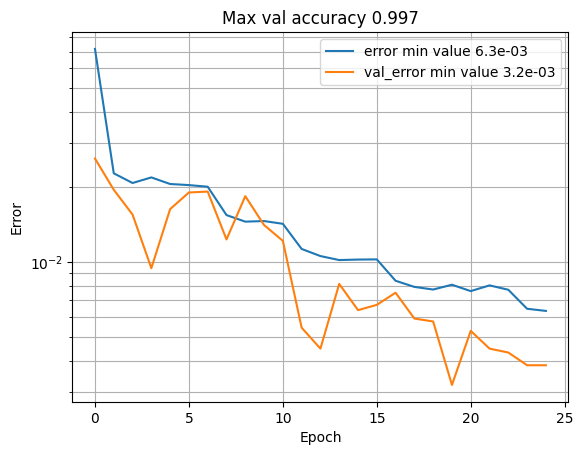

In [41]:
plot_train_evolution(ret)

In [42]:
test_preds = model.predict(test_imgs, batch_size=128, verbose=1)

157/157 [==============================] - 4s 25ms/step


# VISUALIZE

In [43]:
def visualize_test_img_and_pred(idx):
    plt.subplot(121)
    plt.imshow(test_imgs[idx])
    plt.subplot(122)
    plt.plot(test_preds[idx])
    plt.bar(np.arange(11), test_preds[idx])
    plt.title(f'Max pred {np.max(test_preds[idx]):.2f}')
    plt.ylim(0, 1)
    plt.xticks(np.arange(11))

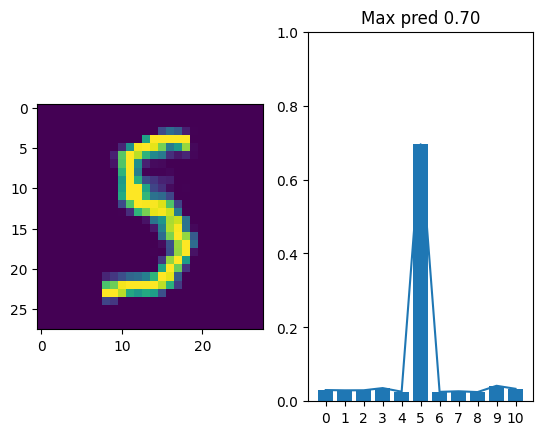

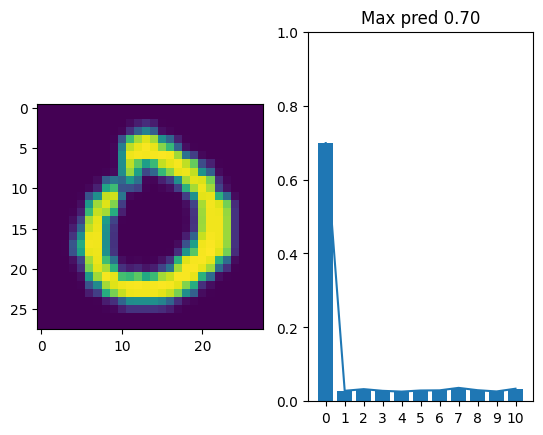

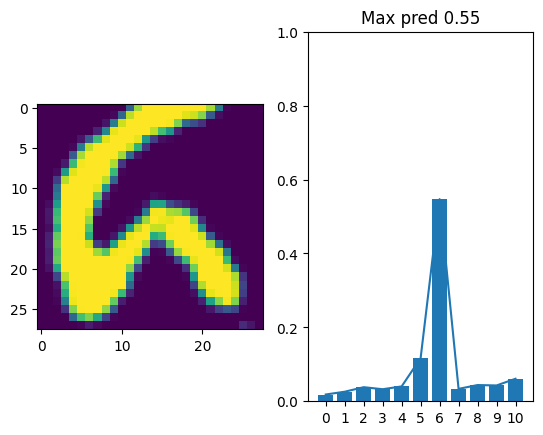

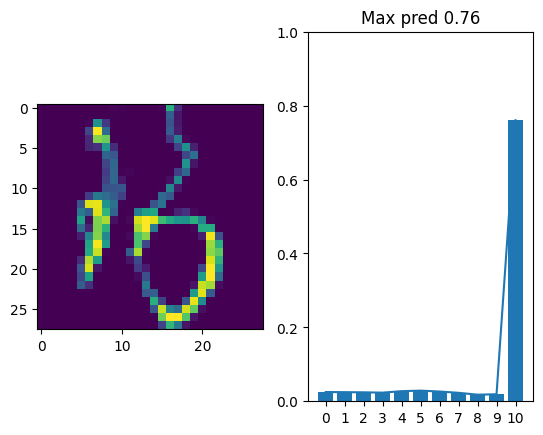

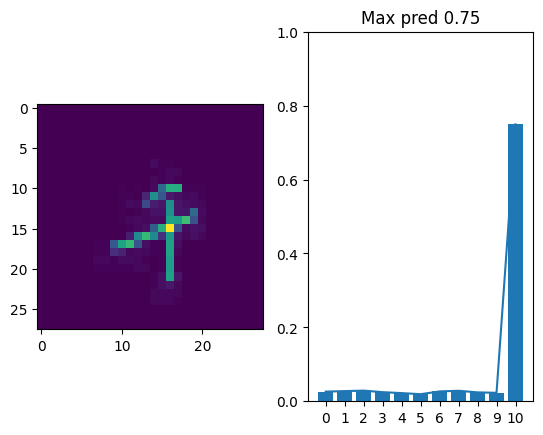

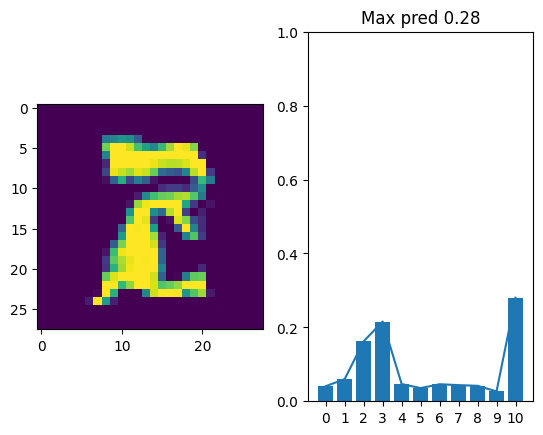

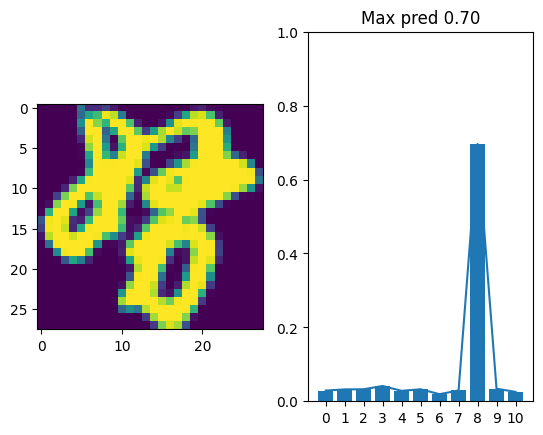

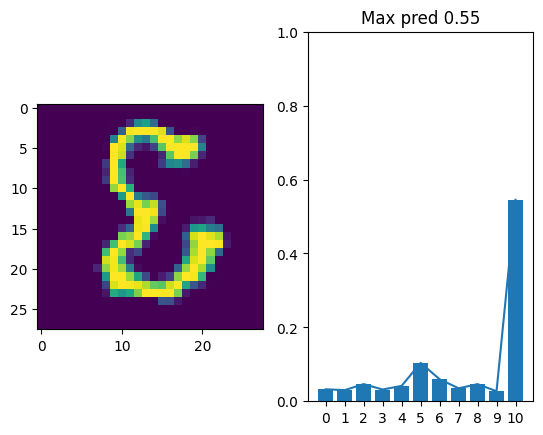

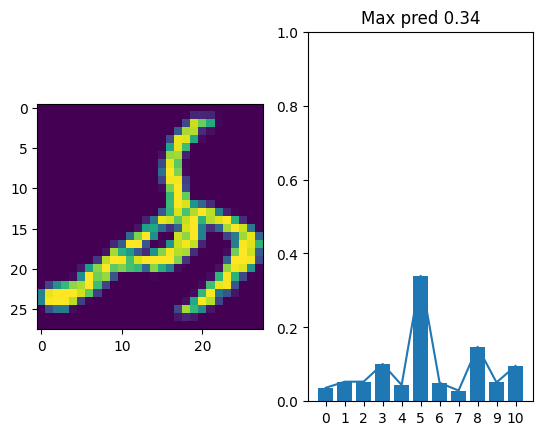

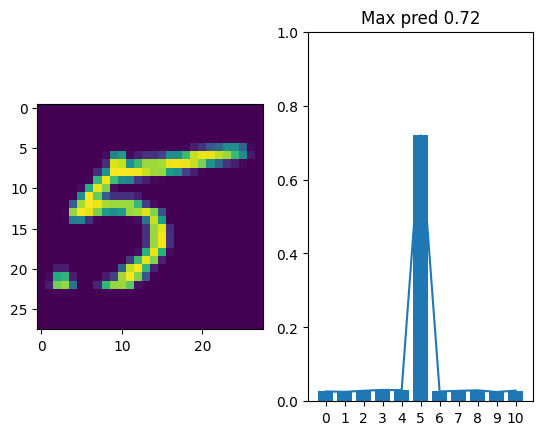

In [44]:
for idx in range(10):
    visualize_test_img_and_pred(idx)
    plt.show()

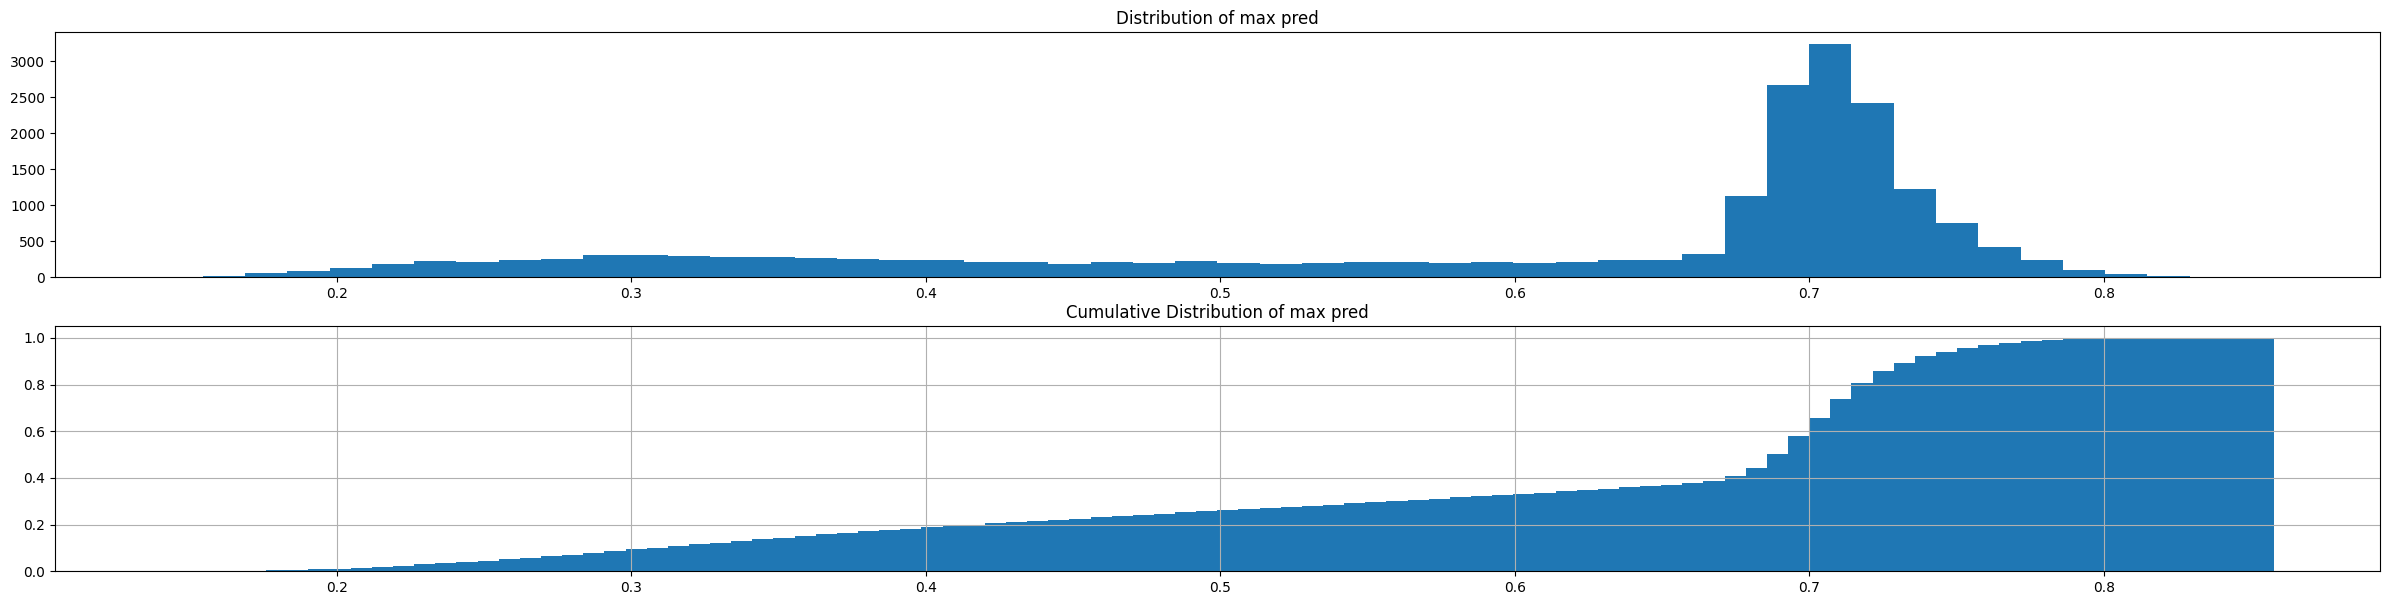

In [45]:
plt.figure(figsize=(30, 7))
max_test_preds = np.max(test_preds, axis=1)
plt.subplot(211)
plt.title('Distribution of max pred')
plt.hist(max_test_preds, bins=50);
plt.subplot(212)
plt.title('Cumulative Distribution of max pred')
plt.hist(max_test_preds, bins=100, cumulative=1, density=True);
plt.grid()

# SUBMIT

In [46]:
test_labels = np.argmax(test_preds, axis=1)
max_test_preds = np.max(test_preds, axis=1)
test_labels[max_test_preds < np.median(max_test_preds)] = 10

# nuevo_umbral = 0.5
# print(np.sum(max_test_preds < np.median(max_test_preds)))
# print(np.sum(max_test_preds < nuevo_umbral))
# test_labels[max_test_preds < nuevo_umbral] = 10

nPrediccionesPorClase = np.unique(test_labels, return_counts=True)
display(pd.Series(nPrediccionesPorClase[1]))

0       917
1       458
2       887
3       991
4       913
5       907
6       654
7       490
8       925
9       933
10    11963
dtype: int64

In [51]:
# porcentaje de no numeros predecido
np.round(nPrediccionesPorClase[1][10]*100/test_labels.shape[0],2)

59.7

In [52]:
submission = pd.read_csv(f'{DATASET_FOLDER}/sample_submission.csv')
assert (submission.name == test_names).all()
submission['label'] = test_labels
submission.head()

,name,label
0,000245159744cee166bd566168033e37,5
1,0002fa2768dff946a9440ba527b7094c,0
2,000e6e1550101554e232afc958ad07ca,10
3,0015f3f045a3d501fd0015a3cdd8a918,10
4,0018f902cf6145276b7703b35f77f6e4,10


In [53]:
submission.to_csv('submission.csv', index=False)